#Design


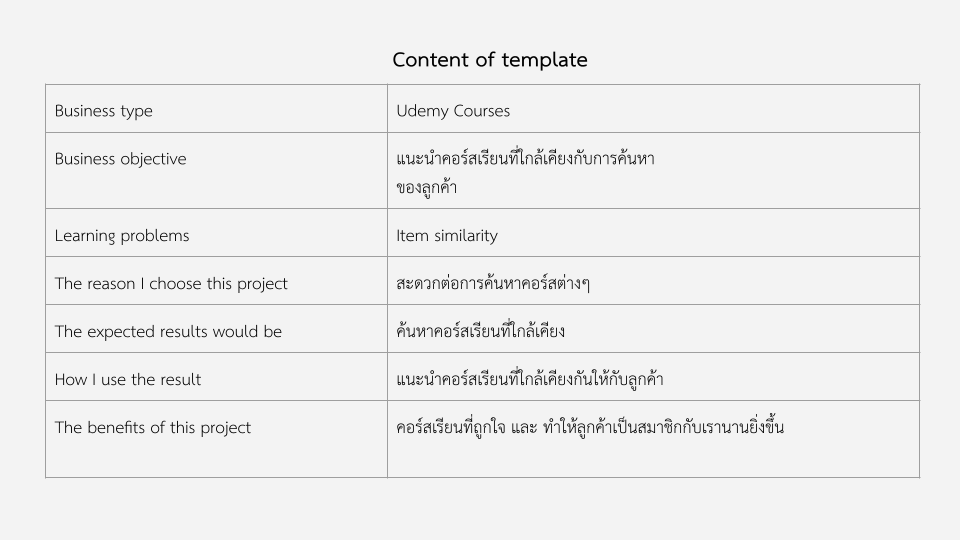

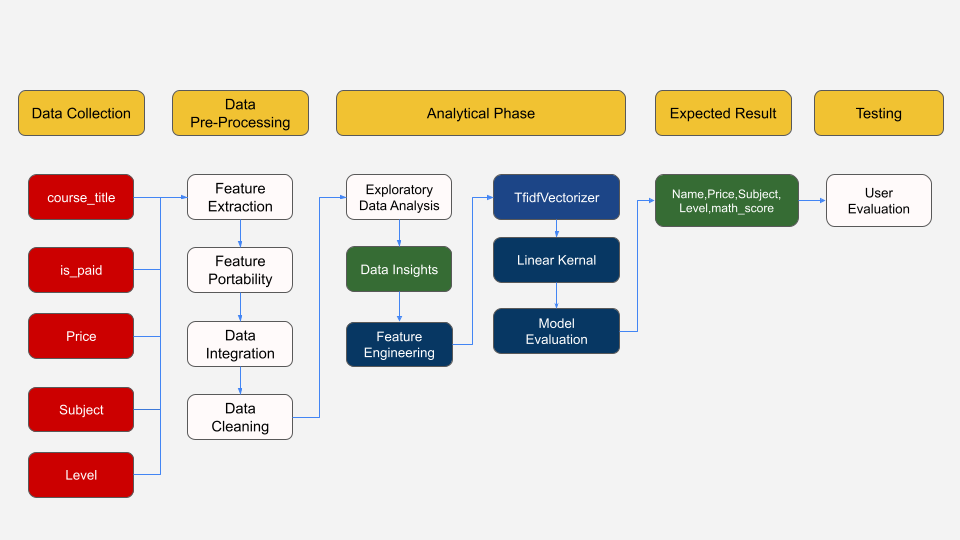

#Check

In [184]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

In [185]:
df = pd.read_csv('http://mybu.fk.in.th/cs434/udemy_courses.csv')

In [186]:
#ดูข้อมูล
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


#Data Preprocessing


In [187]:
df1 = df.copy()

In [188]:
#แปลงค่าปี
df1['year'] = pd.DatetimeIndex(df1['published_timestamp']).year

In [189]:
#จัดตารางใหม่
df1 = df1.reindex(['course_id', 'course_title',  'is_paid', 'price', 'year', 'content_duration', 'subject', 'level', 'url'], axis=1)

##การจัดการข้อมูลภาษาอื่นที่ไม่ใช่ภาษาอังกฤษ

In [190]:
df1.sort_values(by=['course_title'], ascending=False)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url
1477,513846,７日でマスター ビギナー向け Adobe Illustrator どきどきセミナー,True,20,2015,5.500000,Graphic Design,Beginner Level,https://www.udemy.com/7-adobe-illustrator/
672,639126,６時間でインターバンク市場を攻略！最短距離でトレード基礎力,True,35,2015,4.000000,Business Finance,All Levels,https://www.udemy.com/startforex/
1346,1101806,캔바(Canva)로 SNS 콘텐츠 만들기,True,30,2017,2.000000,Graphic Design,Beginner Level,https://www.udemy.com/canvasns/
1323,1009622,超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜,True,80,2016,5.500000,Graphic Design,Beginner Level,https://www.udemy.com/blender-beginner/
875,1028656,财务分析与估值建模入门,False,0,2016,1.500000,Business Finance,Beginner Level,https://www.udemy.com/zprzqgfl/
...,...,...,...,...,...,...,...,...,...
2031,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,2017,0.616667,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-5-...
2034,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-4-...
1994,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,2017,1.500000,Musical Instruments,Intermediate Level,https://www.udemy.com/12-hand-coordination-let...
2021,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/10-hand-coordination-tra...


จากข้อมูลพบว่า มีข้อมูลที่เป็นภาษาอื่นที่ไม่ใช่ภาษาอังกฤษทำให้การค้นหาข้อมูลอาจเกิดการคลาดเคลื่อนได้ จึงจำเป็นต้องตัดข้อมูลภาษาอังกฤษ

In [191]:
#ลบค่าว่าง
df1.dropna(axis=0 ,inplace=True)

In [192]:
#ลบข้อมูลที่ไม่ใช่ภาษาอังกฤษ
df1 = df1[df.course_title.map(lambda x: x.isascii())]

In [193]:
df1.sort_values(by=['course_title'], ascending=False)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url
1388,673142,master course - realistisch zeichnen lernen,True,20,2016,5.000000,Graphic Design,All Levels,https://www.udemy.com/realistisch-zeichnen-ler...
2578,555122,jQuery in Action: Build 8 jQuery Projects,True,100,2015,11.000000,Web Development,All Levels,https://www.udemy.com/jquery-web-development-m...
3028,452684,jQuery for Beginners - Create Website Animatio...,True,100,2015,3.000000,Web Development,All Levels,https://www.udemy.com/jquery-for-beginners-fun...
3098,598516,jQuery for Beginners,True,20,2015,4.000000,Web Development,All Levels,https://www.udemy.com/jquery-for-beginners_sre/
3285,710486,jQuery for Absolute Beginners - Lite,True,20,2015,0.583333,Web Development,All Levels,https://www.udemy.com/jquery-for-absolute-begi...
...,...,...,...,...,...,...,...,...,...
2031,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,2017,0.616667,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-5-...
2034,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-4-...
1994,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,2017,1.500000,Musical Instruments,Intermediate Level,https://www.udemy.com/12-hand-coordination-let...
2021,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/10-hand-coordination-tra...


In [194]:
df1.sample(10)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url
1488,1126016,Portrait Typography in Photoshop - Anyone can ...,True,95,2017,2.500000,Graphic Design,All Levels,https://www.udemy.com/portrait-typography-in-p...
3102,1024844,"Build A Web App with VueJS, Spring Framework a...",True,145,2016,3.500000,Web Development,All Levels,https://www.udemy.com/build-a-message-board-ap...
1001,179820,Introduction to Futures & Options,True,50,2014,4.500000,Business Finance,All Levels,https://www.udemy.com/introduction-to-futures-...
1427,907408,Morphing with After Effect : Everything you n...,True,20,2016,1.000000,Graphic Design,All Levels,https://www.udemy.com/adobe-after-effect-morph...
1879,759972,150 Rock Guitar Licks You MUST Know,True,45,2016,4.500000,Musical Instruments,All Levels,https://www.udemy.com/150-rock-guitar-licks-yo...
2013,1116196,Essential Theory and Technique for Guitar,False,0,2017,2.000000,Musical Instruments,Beginner Level,https://www.udemy.com/essential-theory-and-tec...
2954,482404,CSS3 for beginners,True,195,2015,1.500000,Web Development,Beginner Level,https://www.udemy.com/css-learn-css-from-scratch/
2177,198660,Tenor Banjo for Absolute Beginners,False,0,2014,0.616667,Musical Instruments,Beginner Level,https://www.udemy.com/tenor-banjo-for-absolute...
3448,494510,WordPress Plugin Tutorial,True,40,2015,0.566667,Web Development,Beginner Level,https://www.udemy.com/wordpress-plugin-tutorial/
3342,1116366,HTML and CSS Foundations,False,0,2017,1.000000,Web Development,Beginner Level,https://www.udemy.com/html-and-css-foundations/


เรียกดู Subject และ Level เป็นข้อมูล

In [195]:
df1['level'].value_counts()

All Levels            1827
Beginner Level        1161
Intermediate Level     401
Expert Level            53
Name: level, dtype: int64

In [196]:
df1['subject'].value_counts()

Web Development        1197
Business Finance       1110
Musical Instruments     617
Graphic Design          518
Name: subject, dtype: int64

##การจัดกลุ่มราคา

เรียกดูข้อมูลตามราคาเพื่อใช้ในการจัดกลุ่มราคา

In [197]:
df1.loc[df1['is_paid'] == True].sort_values(by=['price'], ascending=False)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url
0,1070968,Ultimate Investment Banking Course,True,200,2017,1.5,Business Finance,All Levels,https://www.udemy.com/ultimate-investment-bank...
1256,1094930,DIY Design Professional Web Banners in Photosh...,True,200,2017,1.0,Graphic Design,Beginner Level,https://www.udemy.com/design-professional-web-...
3277,1179104,Learning Path: React: Make Stunning React Webs...,True,200,2017,6.5,Web Development,Expert Level,https://www.udemy.com/learning-path-react-make...
444,979616,"Investing In Stocks For Big Gains, Fundamental...",True,200,2016,2.0,Business Finance,All Levels,https://www.udemy.com/fundamental-analysis-of-...
2554,991290,Dynamic JavaScript Master Class AJAX JSON Simp...,True,200,2016,4.5,Web Development,Intermediate Level,https://www.udemy.com/ajax-course/
...,...,...,...,...,...,...,...,...,...
1533,1131780,"Whiteboard Animation, Beginner To Expert - In ...",True,20,2017,1.0,Graphic Design,All Levels,https://www.udemy.com/whiteboardanimation/
2933,512000,WordPress Theme Academy with Bootstrap,True,20,2015,7.5,Web Development,Intermediate Level,https://www.udemy.com/bootstrap-to-wordpress-b...
1535,368958,Advanced Graphic Design-Photoshop CC 2014 for ...,True,20,2014,1.5,Graphic Design,All Levels,https://www.udemy.com/advanced-graphic-design-...
1536,201812,Design Beautiful & Professional Ebooks Using F...,True,20,2014,4.0,Graphic Design,All Levels,https://www.udemy.com/ebook-layouts/


เช็คข้อมูลราคาตามกลุ่มราคาต่าง ๆ เพื่อดูตัวเลขในการจัดกลุ่มราคา

In [198]:
pd.cut(df1['price'], bins=3)

0        (133.333, 200.0]
1       (66.667, 133.333]
2          (-0.2, 66.667]
3       (66.667, 133.333]
4        (133.333, 200.0]
              ...        
3673    (66.667, 133.333]
3674       (-0.2, 66.667]
3675       (-0.2, 66.667]
3676       (-0.2, 66.667]
3677       (-0.2, 66.667]
Name: price, Length: 3442, dtype: category
Categories (3, interval[float64]): [(-0.2, 66.667] < (66.667, 133.333] < (133.333, 200.0]]

In [199]:
pd.qcut(df1['price'], q=3)

0        (65.0, 200.0]
1        (65.0, 200.0]
2         (25.0, 65.0]
3        (65.0, 200.0]
4        (65.0, 200.0]
             ...      
3673     (65.0, 200.0]
3674    (-0.001, 25.0]
3675      (25.0, 65.0]
3676      (25.0, 65.0]
3677      (25.0, 65.0]
Name: price, Length: 3442, dtype: category
Categories (3, interval[float64]): [(-0.001, 25.0] < (25.0, 65.0] < (65.0, 200.0]]

In [200]:
pd.cut(df1['price'], [-np.inf, 0, 66.667, 133.333, np.inf], labels=['Free','Low', 'Mid', 'Hight'])

0       Hight
1         Mid
2         Low
3         Mid
4       Hight
        ...  
3673      Mid
3674      Low
3675      Low
3676      Low
3677      Low
Name: price, Length: 3442, dtype: category
Categories (4, object): ['Free' < 'Low' < 'Mid' < 'Hight']

In [201]:
#สร้างกลุ่มราคา
df1['price_type'] = pd.cut(df1['price'], [-np.inf, 0, 66.667, 133.333, np.inf], labels=['Free','Low', 'Mid', 'Hight'])
df1.head(5)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url,price_type
0,1070968,Ultimate Investment Banking Course,True,200,2017,1.5,Business Finance,All Levels,https://www.udemy.com/ultimate-investment-bank...,Hight
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2017,39.0,Business Finance,All Levels,https://www.udemy.com/goods-and-services-tax/,Mid
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2016,2.5,Business Finance,Intermediate Level,https://www.udemy.com/financial-modeling-for-b...,Low
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2017,3.0,Business Finance,All Levels,https://www.udemy.com/complete-excel-finance-c...,Mid
4,1011058,How To Maximize Your Profits Trading Options,True,200,2016,2.0,Business Finance,Intermediate Level,https://www.udemy.com/how-to-maximize-your-pro...,Hight


เรียกดูข้อมูลอีกครั้งเพื่อตรวจสอบว่าจัดการข้อมูลแล้วหรือยัง

In [202]:
df1.loc[df1['is_paid'] == True].sort_values(by=['course_title'], ascending=False)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url,price_type
1388,673142,master course - realistisch zeichnen lernen,True,20,2016,5.000000,Graphic Design,All Levels,https://www.udemy.com/realistisch-zeichnen-ler...,Low
2578,555122,jQuery in Action: Build 8 jQuery Projects,True,100,2015,11.000000,Web Development,All Levels,https://www.udemy.com/jquery-web-development-m...,Mid
3028,452684,jQuery for Beginners - Create Website Animatio...,True,100,2015,3.000000,Web Development,All Levels,https://www.udemy.com/jquery-for-beginners-fun...,Mid
3098,598516,jQuery for Beginners,True,20,2015,4.000000,Web Development,All Levels,https://www.udemy.com/jquery-for-beginners_sre/,Low
3285,710486,jQuery for Absolute Beginners - Lite,True,20,2015,0.583333,Web Development,All Levels,https://www.udemy.com/jquery-for-absolute-begi...,Low
...,...,...,...,...,...,...,...,...,...,...
2031,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,2017,0.616667,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-5-...,Mid
2034,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/learn-piano-technique-4-...,Mid
1994,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,2017,1.500000,Musical Instruments,Intermediate Level,https://www.udemy.com/12-hand-coordination-let...,Mid
2021,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,2017,1.000000,Musical Instruments,Intermediate Level,https://www.udemy.com/10-hand-coordination-tra...,Mid


In [203]:
df1.loc[df1['is_paid'] == False].sort_values(by=['course_title'], ascending=False)

,course_id,course_title,is_paid,price,year,content_duration,subject,level,url,price_type
1802,1257976,Your First 10 Guitar Lessons - Learn how to pl...,False,0,2017,1.000000,Musical Instruments,Beginner Level,https://www.udemy.com/your-first-10-guitar-les...,Free
3473,752706,Write quicker HTML5 and CSS 3; productivity ha...,False,0,2016,1.500000,Web Development,All Levels,https://www.udemy.com/write-quicker-html5-and-...,Free
2718,1068590,Wordpress Website Mastery 2017,False,0,2017,2.500000,Web Development,Beginner Level,https://www.udemy.com/wordpress-website-master...,Free
3547,883706,Wordpress Beginner Tutorial: Build Your First ...,False,0,2016,1.500000,Web Development,Beginner Level,https://www.udemy.com/wordpress-beginner-tutor...,Free
3259,552598,WordPress in under an hour - Create/manage you...,False,0,2015,1.000000,Web Development,All Levels,https://www.udemy.com/learn-wordpress-in-57-mi...,Free
...,...,...,...,...,...,...,...,...,...,...
3539,309820,ASP.Net MVC Quick Start,False,0,2016,5.500000,Web Development,Intermediate Level,https://www.udemy.com/aspnet-mvc-quick-start/,Free
3668,270976,A how to guide in HTML,False,0,2014,0.583333,Web Development,Beginner Level,https://www.udemy.com/a-how-to-guide-in-html/,Free
1898,955914,A beginner`s guide to fingerpicking and strumm...,False,0,2016,2.000000,Musical Instruments,Beginner Level,https://www.udemy.com/guitar-domination-finger...,Free
1798,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,0,2015,0.600000,Musical Instruments,Beginner Level,https://www.udemy.com/nationalguitaracademy/,Free


##การเลือกข้อมูลสำหรับเปรียบเทียบ

เรียกดู Columns ต่าง ๆ เพื่อหาข้อมูลว่าใช้อะไรมาเปรียบเทียบได้บ้าง

In [204]:
df1.columns

Index(['course_id', 'course_title', 'is_paid', 'price', 'year',
       'content_duration', 'subject', 'level', 'url', 'price_type'],
      dtype='object')

เนื่องจาก Column content_duration ไม่สามารถอ้างอิงได้ว่าเป็นข้อมูลส่วนใด จึงไม่น้ำมาประกอบในการเปรียบ

In [205]:
df1['content_duration'].describe()

count    3442.000000
mean        4.109113
std         6.076051
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

เนื่องจาก Column url บางส่วน ในส่วนหลังของ URL ไม่สอดคล้องกับ course_title จึงไม่น้ำมาประกอบในการเปรียบ

In [206]:
df1.loc[1798, 'url']

'https://www.udemy.com/nationalguitaracademy/'

In [207]:
df1.loc[1798, 'course_title']

'7 Ways A Beginner Guitarist Can Sound Better, Instantly!'

#EDA


In [208]:
px.histogram(data_frame=df1, x="price",marginal="box",title="Price of Udemy Courses")

In [209]:
fig = px.bar(df1, y= 'price', x='subject', hover_data = df1[['year','subject']], color='level')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(xaxis = go.layout.XAxis(tickangle = 45))
fig.show()

In [210]:
alt.Chart(df1, title='Income').mark_bar().encode(
    x='subject',
    y='price',
    color='price_type',
    tooltip=list(df1.columns)
).properties(width=750, height=500)


alt.Chart(...)

In [211]:
px.funnel_area(names=df1["price_type"],
                  values=df1["price"],
                  title="Price Level",width=500,height=500
                 )

In [212]:
px.histogram(data_frame=df1, x="price_type", title="Count of Udemy Courses Price Level")

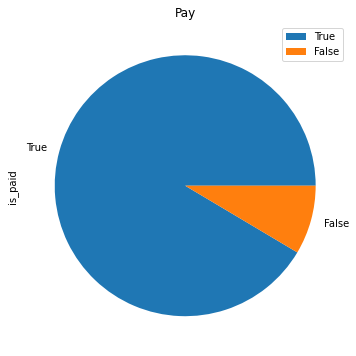

In [213]:
df1['is_paid'].value_counts().to_frame().plot.pie(y='is_paid', figsize=(8,6),title='Pay');

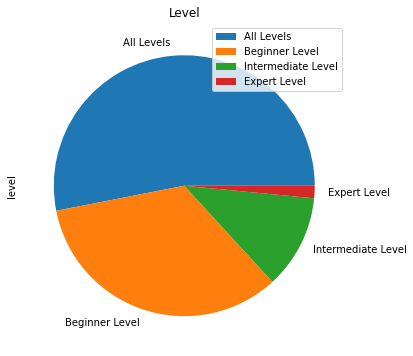

In [214]:
df1['level'].value_counts().to_frame().plot.pie(y='level', figsize=(8,6),title='Level');

In [215]:
px.histogram(data_frame=df1, x="subject" ,title="Count of Udemy Courses Subject")

#Feature Engineering



In [216]:
data = df1.copy()

##ตรวจสอบข้อมูลที่ให้ในการเปรียบเทียบ

เลือกใช้ CountVectorizer และ TfidfVectorizer ในการตัดคำ

In [217]:
count_vectorizer = CountVectorizer(lowercase=True, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')

เรียกดูข้อมูล Columns ว่าเป็นข้อมูลประเภทใด้บ้าง

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3442 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   course_id         3442 non-null   int64   
 1   course_title      3442 non-null   object  
 2   is_paid           3442 non-null   bool    
 3   price             3442 non-null   int64   
 4   year              3442 non-null   int64   
 5   content_duration  3442 non-null   float64 
 6   subject           3442 non-null   object  
 7   level             3442 non-null   object  
 8   url               3442 non-null   object  
 9   price_type        3442 non-null   category
dtypes: bool(1), category(1), float64(1), int64(3), object(4)
memory usage: 408.9+ KB


In [219]:
describe = data['course_title'] + '|' + data['subject'] + '|' + data['level'] + '|' + data['price_type'].astype(str)
name_descride = data['course_title'] + '|' + data['subject']
describe.sample(5)

1837    Play Piano 7: Improvise on For All We Know in ...
3198    Accelerated ES6 JavaScript Training|Web Develo...
2171    Gibson's Learn & Master Guitar|Musical Instrum...
3109    CSS Specialist: Comprehensive CSS Training|Web...
3452    Learn PHP Programming for Absolute Beginners|W...
dtype: object

##ฟังก์ชั่นเพื่อรับค่า และประเภทในการตัดคำและเปรียบเทียบ

In [220]:
def similarity(describe, vetorize, ct):
  time_start = time.time()
  subject_count_matrix = vetorize.fit_transform(describe)
  subject_cosine_sim = ct(
      subject_count_matrix, subject_count_matrix)
  time_end = time.time()
  print(f"Similarity : {round(time_end - time_start, 2)} second")
  subject_count_matrix.shape
  return subject_cosine_sim

##การเลือกใช้ฟังก์ชั่น


เลือกใช้ TfidfVectorizer ร่วมกับ Linear Kernel 

In [221]:
subject_lin = similarity(describe, tfidf_vectorizer, linear_kernel)
count_lin = similarity(describe, count_vectorizer, linear_kernel)
count_cos = similarity(describe, tfidf_vectorizer, cosine_similarity)
count_cos_ti = similarity(describe, count_vectorizer, cosine_similarity)

Similarity : 0.32 second
Similarity : 0.32 second
Similarity : 0.3 second
Similarity : 0.29 second


เลือกใช้ CountVectorizer ร่วมกับ Cosine Similarity

In [222]:
name_cosine_sim = similarity(name_descride, count_vectorizer, cosine_similarity)
name_tif = similarity(name_descride, tfidf_vectorizer, cosine_similarity)
name_tif_lin = similarity(name_descride, tfidf_vectorizer, linear_kernel)
name_cou_lin = similarity(name_descride, count_vectorizer, linear_kernel)

Similarity : 0.16 second
Similarity : 0.18 second
Similarity : 0.13 second
Similarity : 0.3 second


##คลาสที่แนะนำข้อมูล

In [223]:
class Recommendations:
    def __init__(self, name: str, amount: int = 5):
        self.name = self.nearest_name(name)
        self.amount = amount

    def nearest_name(self, name: str):
        close = self.get_close_matches(name)
        get_sr = data['course_title'][data['course_title'].isin([name])]
        if len(get_sr) != 0:
            return get_sr.iloc[0]
        elif close:
            return close[0]
        return None

    def get_close_matches(self, name: str):
        global data
        get_sr2 = data['course_title'][data['course_title'].apply(
            lambda x: x.lower()).str.contains(name.lower())]
        if len(get_sr2) != 0:
            return get_sr2.tolist()
        return []

    def get_indices(self):
        metadata = data.reset_index()
        indices = pd.Series(metadata.index, index=metadata['course_title'])
        if not self.name:
            return None
        return indices[self.name]

    def get_recommendations(self, cosine_sim=subject_lin):
        indice = self.get_indices()
        if not indice:
            return 'No name was near'
        sim_scores = list(enumerate(cosine_sim[indice]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:self.amount + 1]
        #print(sim_scores)
        _indices = [i[0] for i in sim_scores]
        recs = data[['course_title', 'price_type', 'price', 'subject', 'level']].iloc[_indices]
        recs['match_score'] = [i[1] for i in sim_scores]
        recs['match_score'] = recs['match_score'].apply(lambda x: round(x, 4))
        recs = recs.loc[recs['course_title'] != self.name]
        #print(recs)
        return recs.loc[recs.match_score > 0, ['course_title', 'price', 'subject', 'price_type', 'level', 'match_score']]

    def get_detail(self):
        return data.loc[data['course_title'] == self.name, ['course_title', 'price', 'subject', 'price_type', 'level']]

In [224]:
recommend = Recommendations('Forex')

recommend.get_detail()

,course_title,price,subject,price_type,level
10,Forex Trading Secrets of the Pros With Amazon'...,200,Business Finance,Hight,All Levels


เรียกดูข้อมูลความใกล้เคียงจากชื่อ ราคา เนื้อหา และความยากง่าย

In [225]:
recommend.get_recommendations()

,course_title,price,subject,price_type,level,match_score
469,Forex Trading,95,Business Finance,Mid,All Levels,0.3797
3217,Hosting Django: Amazon Web Services (AWS) Fund...,45,Web Development,Low,All Levels,0.3514
298,Technical Analysis 101: Secrets of Trading Rev...,150,Business Finance,Hight,All Levels,0.3305
117,"Forex Trading Secrets |MT4 Robot (EA) inside, ...",150,Business Finance,Hight,All Levels,0.3193
2870,Wordpress on AWS: The Easy way to AWS for Free...,40,Web Development,Low,All Levels,0.3163


เปรียบเทียบแค่ชื่อกับเนื้อหาเท่านั้น

In [226]:
recommend.get_recommendations(name_cosine_sim)

,course_title,price,subject,price_type,level,match_score
469,Forex Trading,95,Business Finance,Mid,All Levels,0.7071
106,Fundamentals of Forex Trading,0,Business Finance,Free,All Levels,0.6325
475,Forex Trading Profitably,20,Business Finance,Low,All Levels,0.6325
743,Forex trading made simple,100,Business Finance,Mid,All Levels,0.6325
775,Forex Elite Trading,85,Business Finance,Mid,All Levels,0.6325


#Modelling

##จากการทดสอบ การเปรียบเทียบข้อมูล





###เปรียบเทียบด้วยข้อมูล ชื่อเนื้อหา ราคา ประเภท และความยากง่ายของเนื้อหา

1.การเปรียบเทียบด้วยข้อมูล ชื่อเนื้อหา ราคา ประเภท และความยากง่ายของเนื้อหา   
1.1.เปรียบเทียบด้วย TfidfVectorizer ร่วมกับ Cosine Similarity.
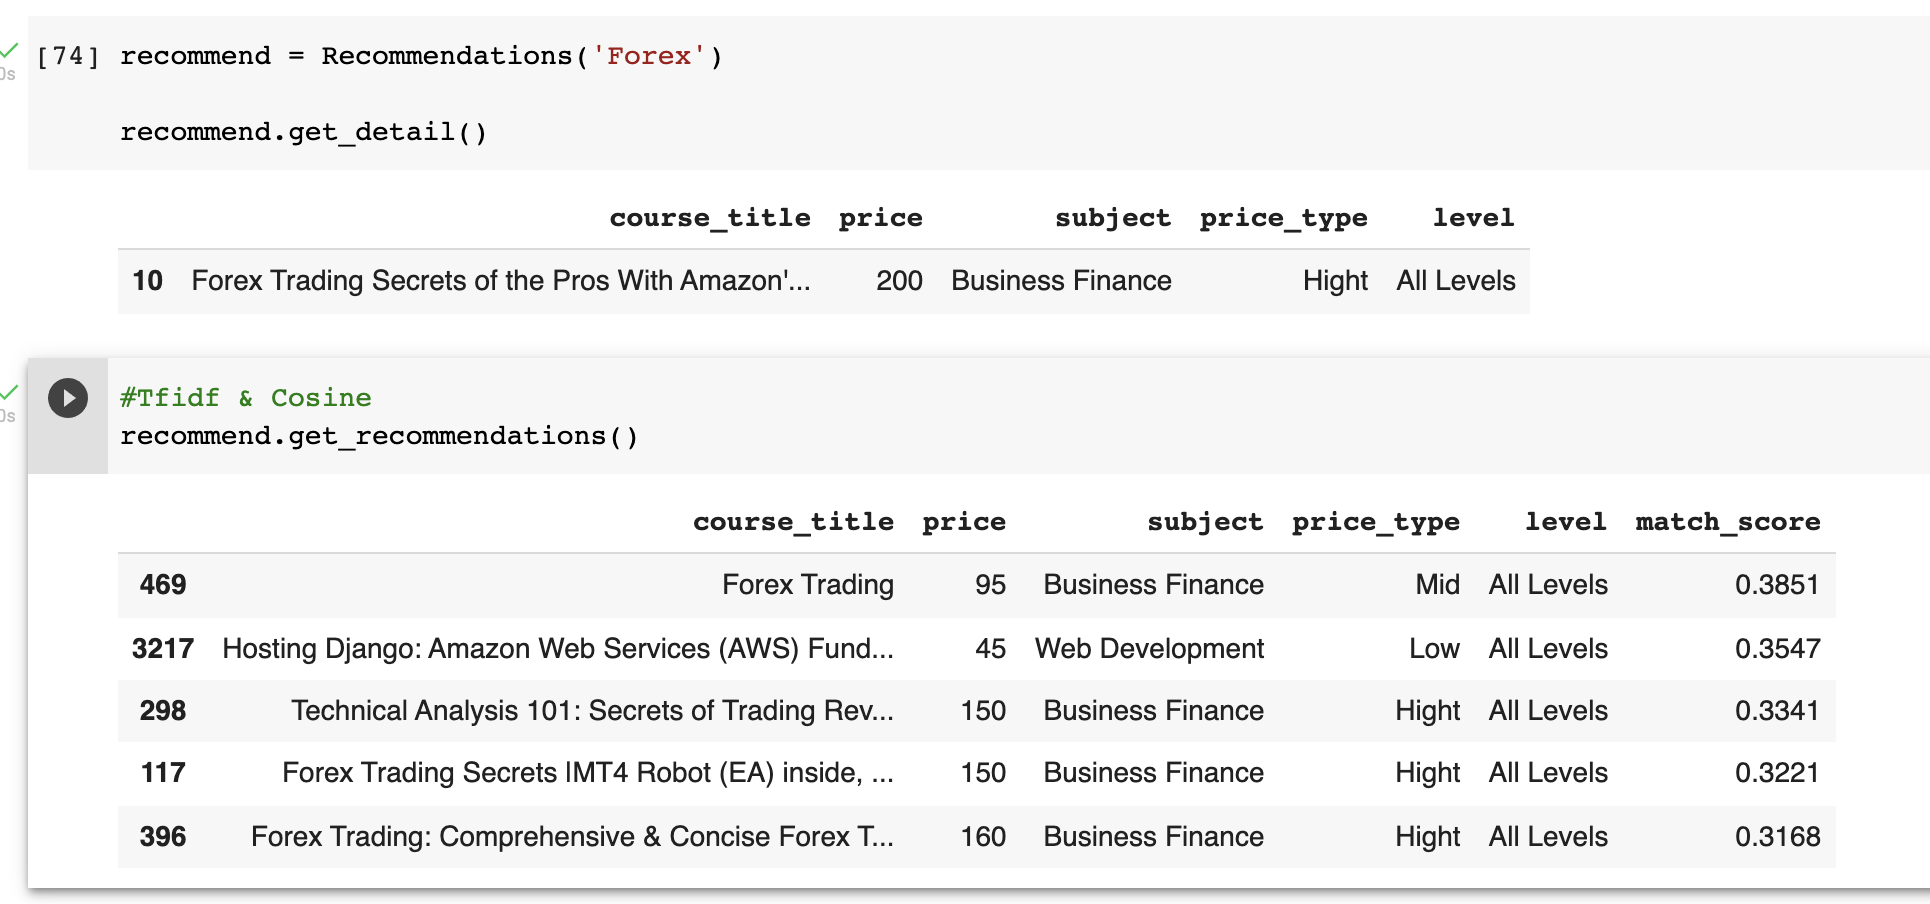
1.2.เปรียบเทียบด้วย TfidfVectorizer ร่วมกับ Linear Kernel.
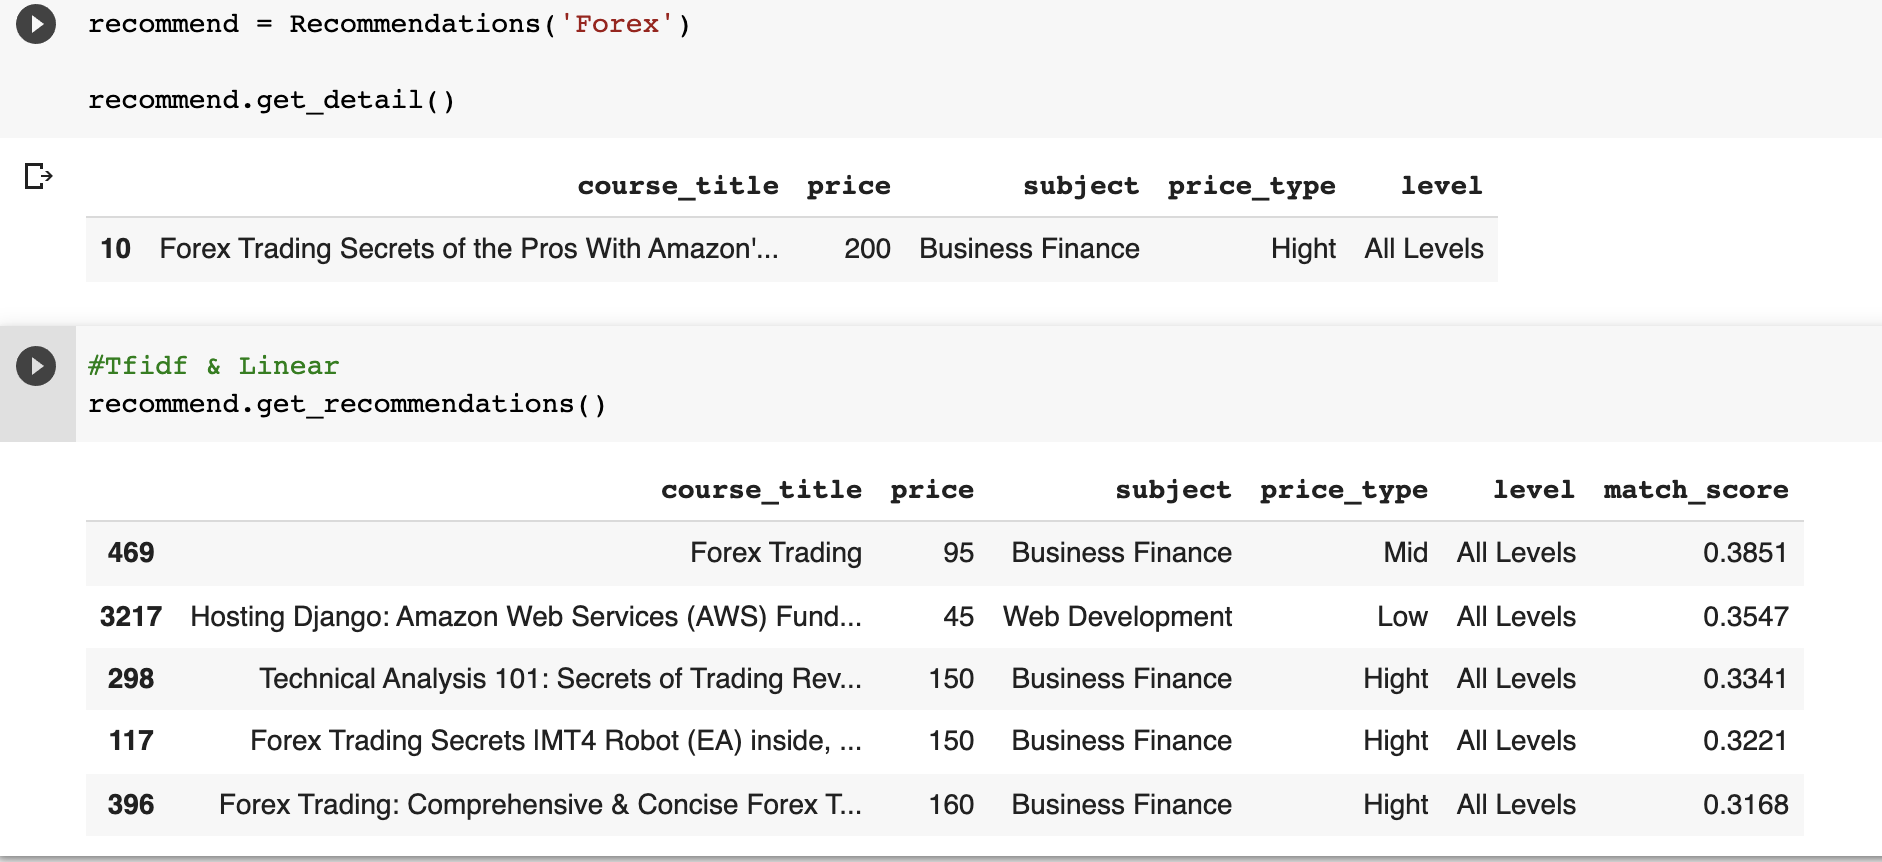
1.3.เปรียบเทียบด้วย CountVectorizer ร่วมกับ Cosine Similarity.
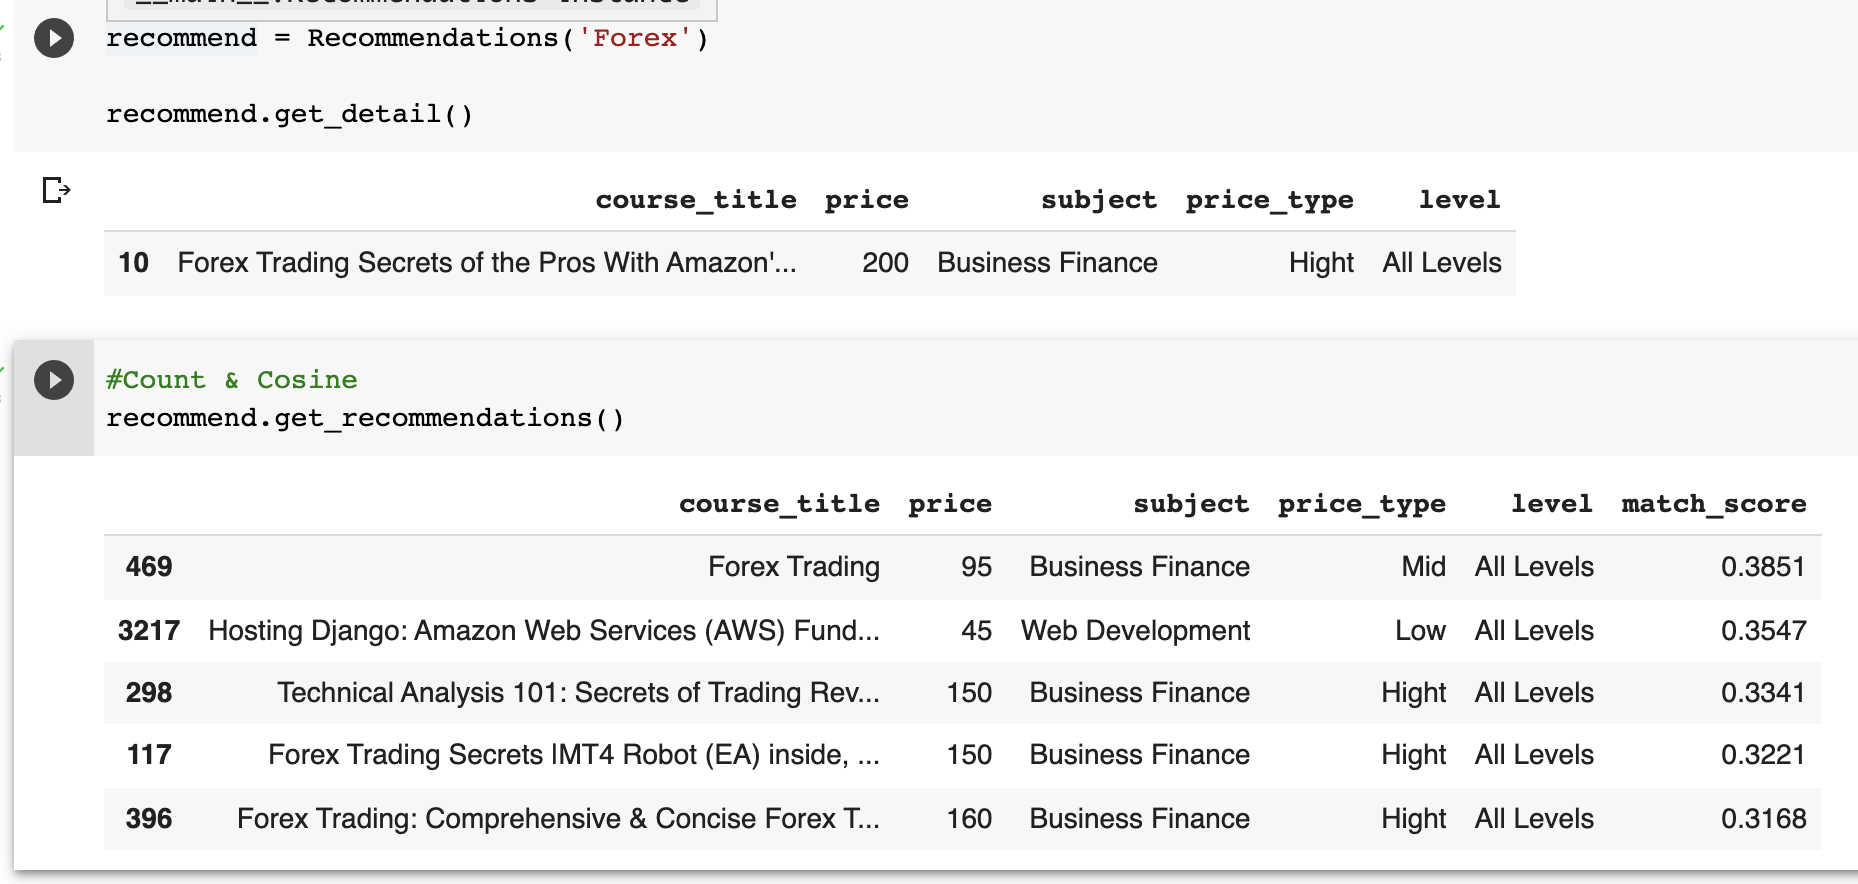
1.4.เปรียบเทียบด้วย CountVectorizer ร่วมกับ Linear Kernel.  
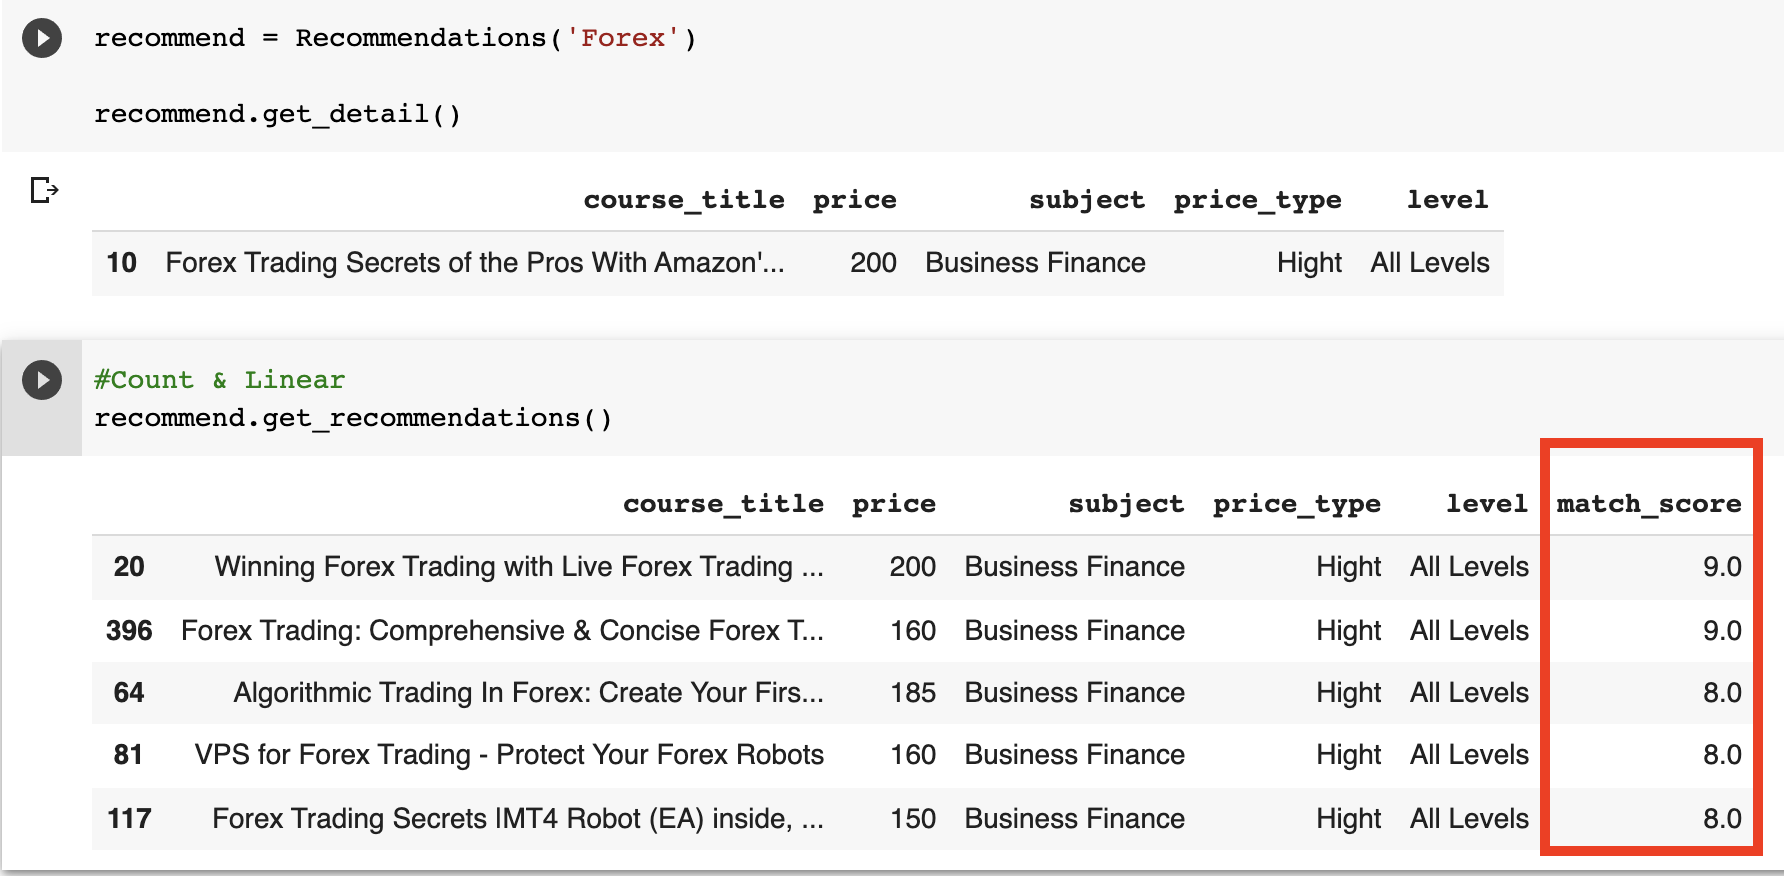
จากข้อมูลที่ได้พบว่า การใช้ CountVectorizer ร่วมกับ Linear Kernel มีปัญหาที่กรเปรียบเทียบคะแนนโดยไม่ทราบสาเหตุ จึงไม่ใช้วิธีการดังกล่าว และเนื่องจากความแต่ต่างข้อข้อมูลที่มาจากการเปลี่ยบเทียบอื่น ๆ ที่เหลือไม่แตกต่างกันมาก ***ในที่นี้จึงเลือกใช้ TfidfVectorizer ร่วมกับ Linear Kernel*** เพราะใช้เวลาในการค้นหาข้อมูลน้อยที่สุด

###เปรียบเทียบด้วยข้อมูล ชื่อเนื้อหา และ ประเภท

2.การเปรียบเทียบด้วยข้อมูล ชื่อเนื้อหา ราคา ประเภท และความยากง่ายของเนื้อหา.  
2.1.เปรียบเทียบด้วย TfidfVectorizer ร่วมกับ Linear Kernel.
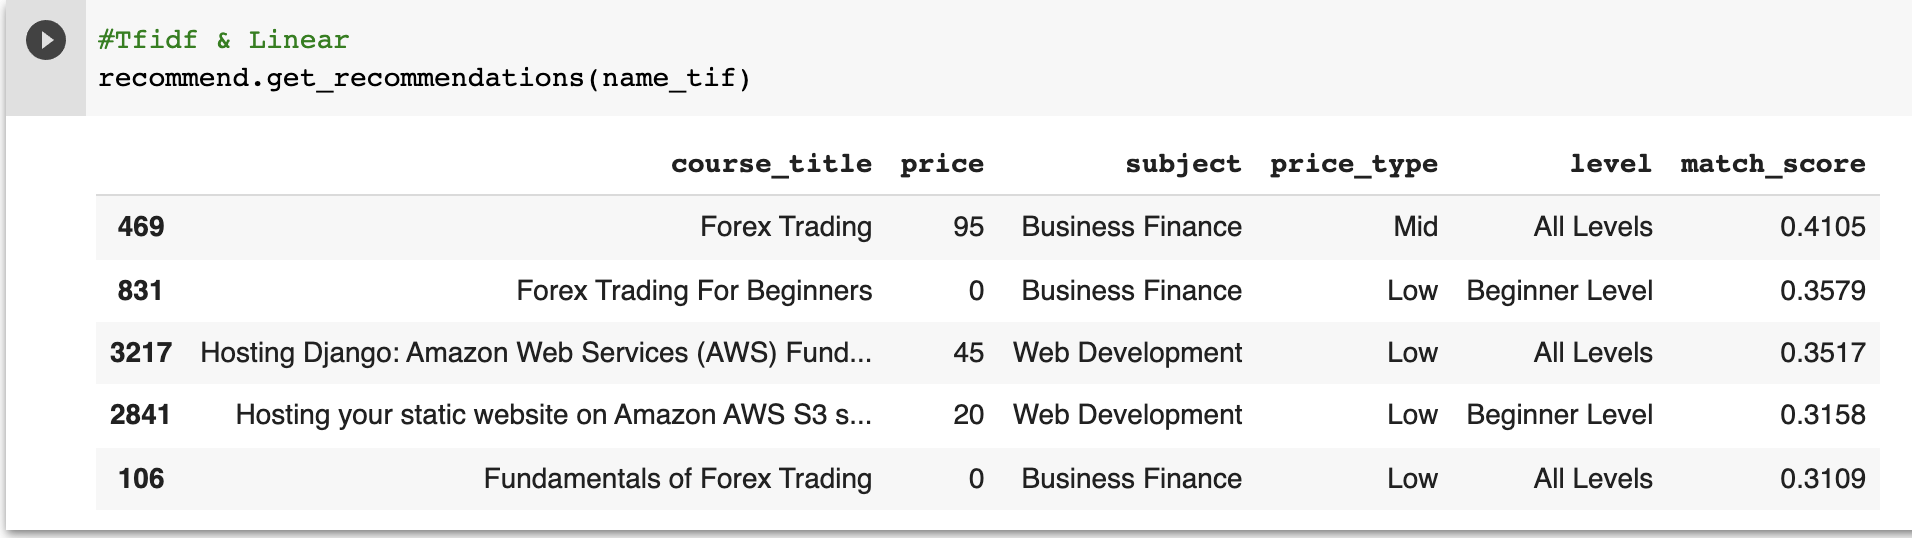
2.2.เปรียบเทียบด้วย TfidfVectorizer ร่วมกับ Cosine Similarity.
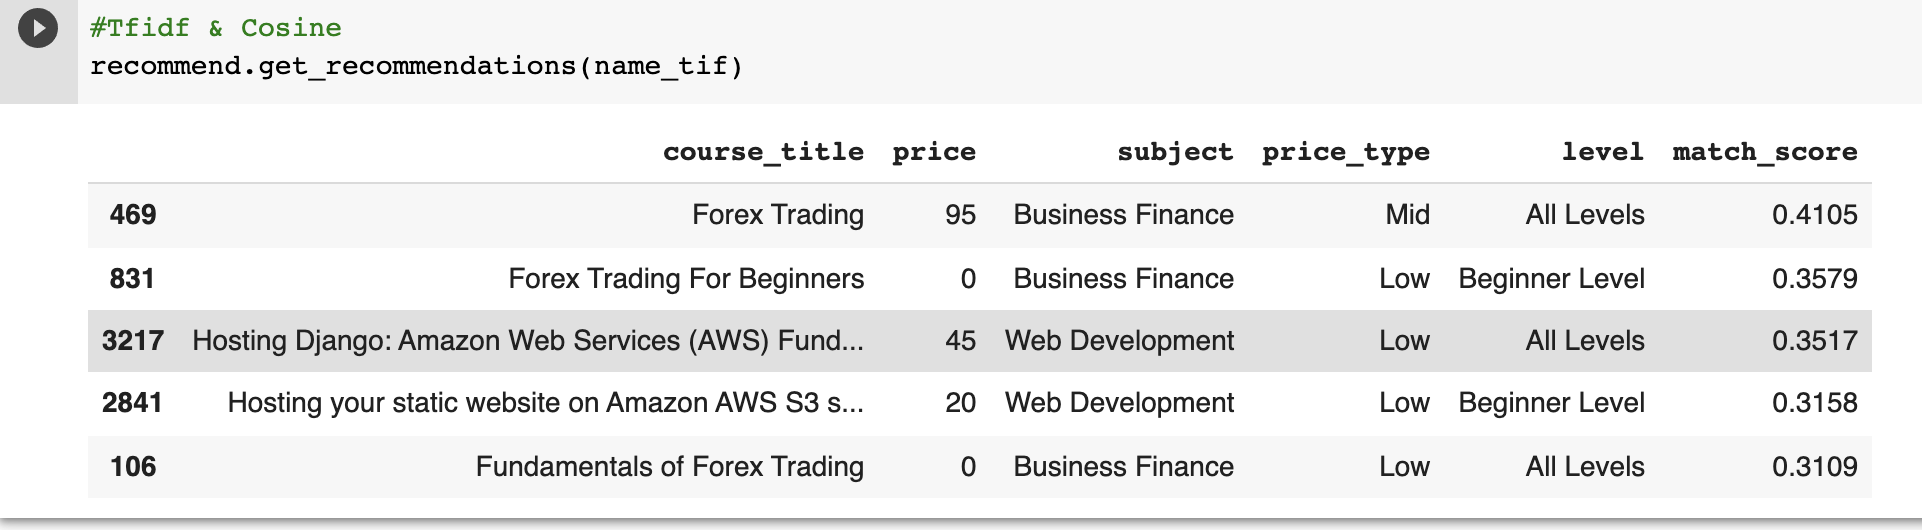
2.3.เปรียบเทียบด้วย CountVectorizer ร่วมกับ Cosine Similarity.   
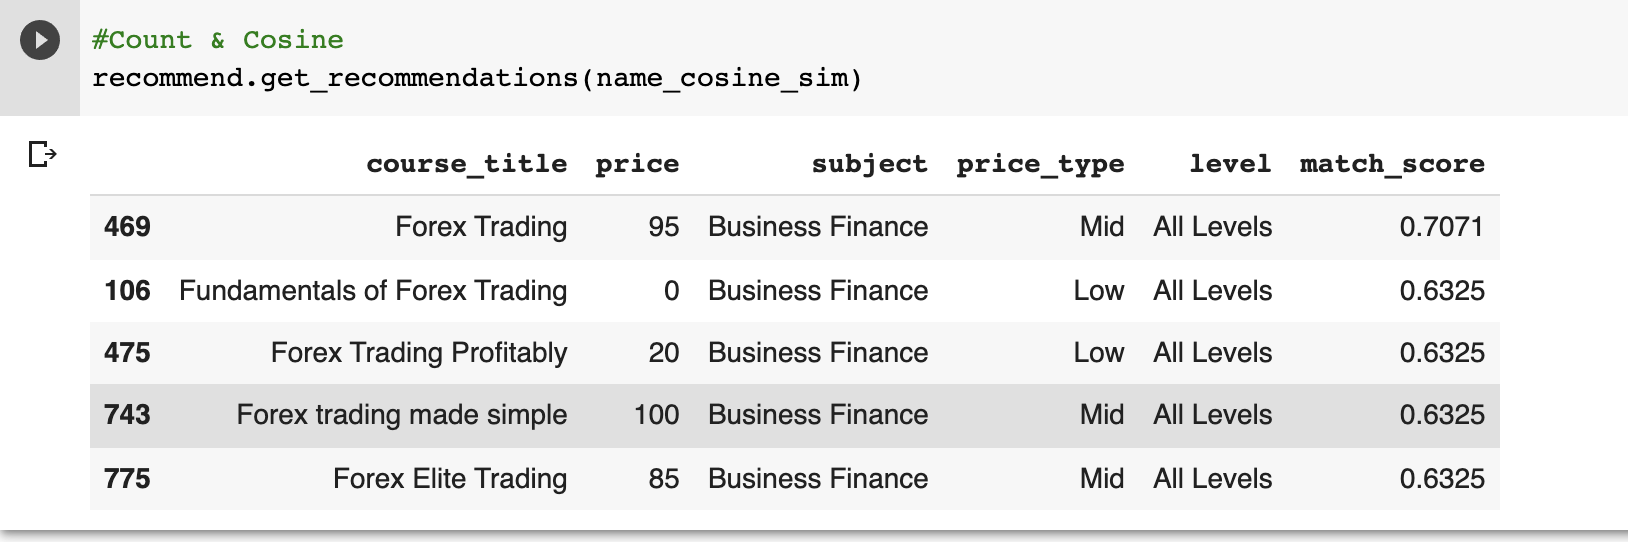
2.4.เปรียบเทียบด้วย CountVectorizer ร่วมกับ Linear Kernel.
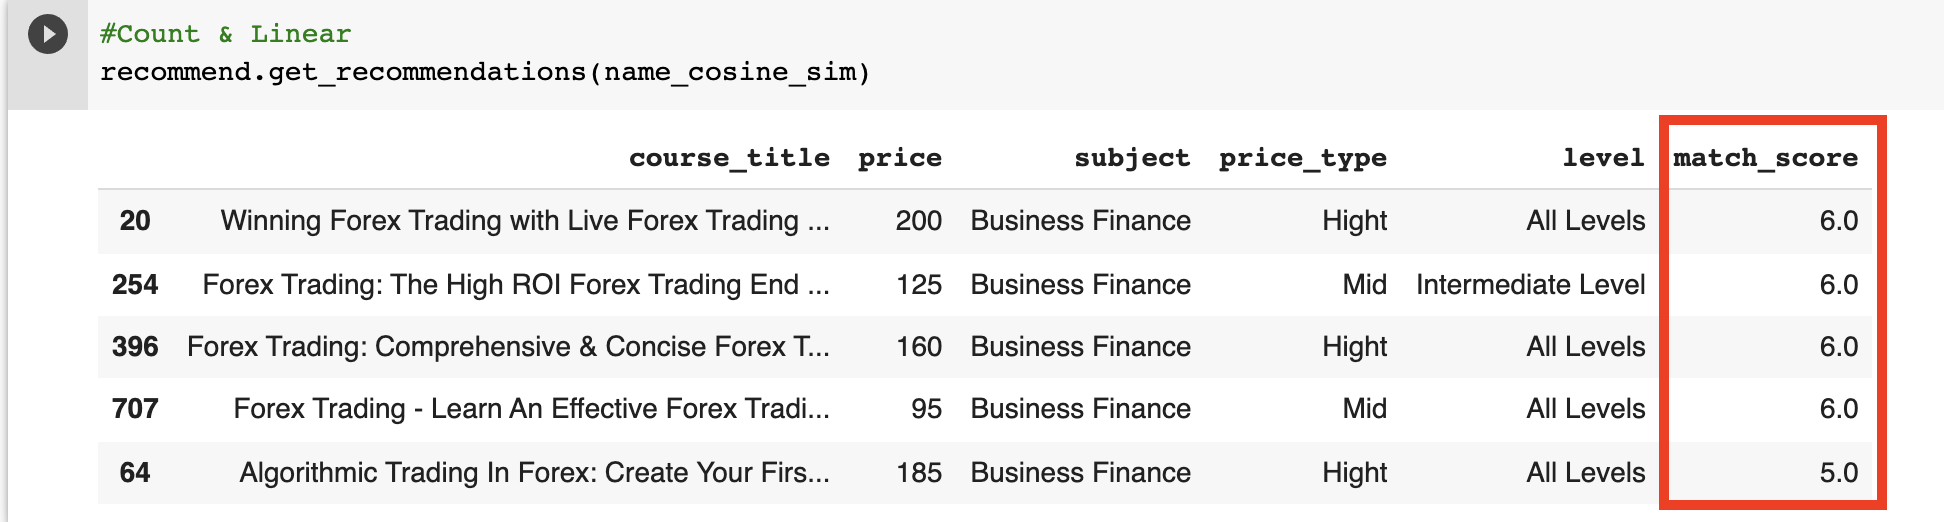
จากข้อมูลที่ได้พบว่า การใช้ CountVectorizer ร่วมกับ Linear Kernel มีปัญหาที่กรเปรียบเทียบคะแนนโดยไม่ทราบสาเหตุเช่นเดียวกัน จึงไม่ใช้วิธีการดังกล่าว และจากการเปรียบเทียบการใช้ ใช้ CountVectorizer ร่วมกับ Cosine Similarity มีความแม่นยำที่สุด ***ในที่นี้จึงเลือกใช้ CountVectorizer ร่วมกับ Cosine Similarity*** เพราะใช้เวลาในการค้นหาข้อมูลน้อยที่สุด

ในแง่เวลา ทุกตัวใช้เวลาไม่ต่างกันมาก

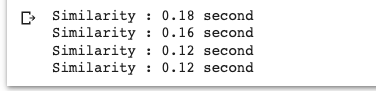

#Pipeline

##**Preprocessing**


- duplicates data
- drop null
- convert 'published_timestamp' to 'year'
- drop rows

- remove unused columns

##**Feature Engineering**

1.เลือกด้วย การชำระเงิน, ราคา, ประเภท โดย TfidfVectorizer, Linear Similarity   


2.เลือกด้วย ชื่อ โดย TfidfVectorizer, Linear Similarity

In [227]:
class Pipeline:
    def __init__(self, data: pd.DataFrame, vetorize: CountVectorizer or TfidfVectorizer):
        self.data = data.copy()
        self.vetorize = vetorize

    def data_cleaning(self):
        self.data.drop_duplicates(subset='course_title', inplace=True)
        self.data.dropna(axis=0, inplace=True)

    def remove_columns(self):
        mapping = {'course_title': 'Title', 'price': 'Price', 'is_paid': 'Pay', 'subject': 'Subject', 'level': 'Level'}
        self.data = self.data.reindex(columns=['course_title', 'price', 'is_paid', 'subject', 'level'])
        self.data.rename(columns=mapping, inplace=True)

    def build_columns(self):
         self.data['price_type'] = pd.cut(df1['price'], [-np.inf, 0, 66.667, 133.333, np.inf], labels=['Free','Low', 'Mid', 'Hight'])
         return self.data
         
    def reset_index(self):
        self.data.reset_index(drop=True, inplace=True)

    def feature_engineering(self):
        return self.vetorize.fit_transform(self.content)

    def build_content(self, columns=[]):
        results = ""
        for col in columns:
            results += self.data[col].astype(str) + '|'
        return results

    def build(self, content=[]):
        self.data_cleaning()
        self.remove_columns()
        self.build_columns()
        self.content = self.build_content(content)
        self.reset_index()
        return self.feature_engineering()
        

In [228]:
pipe = Pipeline(df, tfidf_vectorizer)
matrix = pipe.build(['Title', 'Pay', 'Subject', 'Level'])
content_similarity = linear_kernel(matrix, matrix)

In [229]:
recommend = Recommendations('Forex')
recommend.get_detail()

,course_title,price,subject,price_type,level
10,Forex Trading Secrets of the Pros With Amazon'...,200,Business Finance,Hight,All Levels


In [230]:
recommend.get_recommendations()

,course_title,price,subject,price_type,level,match_score
469,Forex Trading,95,Business Finance,Mid,All Levels,0.3797
3217,Hosting Django: Amazon Web Services (AWS) Fund...,45,Web Development,Low,All Levels,0.3514
298,Technical Analysis 101: Secrets of Trading Rev...,150,Business Finance,Hight,All Levels,0.3305
117,"Forex Trading Secrets |MT4 Robot (EA) inside, ...",150,Business Finance,Hight,All Levels,0.3193
2870,Wordpress on AWS: The Easy way to AWS for Free...,40,Web Development,Low,All Levels,0.3163


In [231]:
pipe = Pipeline(df, count_vectorizer)
matrix = pipe.build(['Title', 'Subject'])
name_similarity = cosine_similarity(matrix, matrix)

In [232]:
recommend.get_recommendations(name_cosine_sim)

,course_title,price,subject,price_type,level,match_score
469,Forex Trading,95,Business Finance,Mid,All Levels,0.7071
106,Fundamentals of Forex Trading,0,Business Finance,Free,All Levels,0.6325
475,Forex Trading Profitably,20,Business Finance,Low,All Levels,0.6325
743,Forex trading made simple,100,Business Finance,Mid,All Levels,0.6325
775,Forex Elite Trading,85,Business Finance,Mid,All Levels,0.6325


#Deployment

In [233]:
!pip install gradio -q

In [234]:
import gradio as gr

In [235]:
def get_recommendations(name, type='content', checkbox=False):
    mapping = {
        'content': subject_lin,
        'name': name_cosine_sim
    }
    search_value = {
        'content': 'Name, Pay, Subject, Level',
        'name': 'Name, Subject'
    }
    name = df_temp.sample(1)['Title'].item() if checkbox else name

    recommend = Recommendations(name)
    detail = recommend.get_detail()
    return detail, recommend.get_recommendations(mapping[type]), search_value[type]

In [ ]:
iface = gr.Interface(
    get_recommendations,
    inputs=[
        gr.inputs.Textbox(label='Course Name',
                          default="Forex"),
        gr.inputs.Radio(
            ["content", "name"], label='Search By')],
    outputs=[gr.outputs.Dataframe(label='Course'),
             gr.outputs.Dataframe(label='Course Similar'),
             gr.outputs.Textbox(label='Search By')])
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://55246.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


#Reference




*   https://www.kaggle.com/andrewmvd/udemy-courses
*   https://www.kaggle.com/kingamarszalkowska/predicting-no-of-subscribers-of-udemy-courses
*   https://www.kaggle.com/dyasnurlitasarip/notebook-udemy-course-dyasp
*   https://www.kaggle.com/anmolprakash121/udemy-eda
*   https://seaborn.pydata.org
*   https://github.com/king-glitch/cs-434
*   https://github.com/supat55/cs434RachamonVer3







#members

นางสาวญาณภา วรสิทธิกร 1620700995.  
นายวริศ ขันตี 1620701068.  
นายอนุชา สีเสือ 1620707206.  